In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import  pad_sequences


In [3]:
file = "C:/VIN_PYCHARM/ONE/Data/sarcasm.json"

with open(file,"r") as f:
    datastore = json.load(f)

In [8]:
vocab_size = 10000
embed_dim =16
max_len = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [5]:
sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])



In [9]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_len, truncating=trunc_type, padding = padding_type)

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded   = pad_sequences(testing_sequence, maxlen=max_len, padding=padding_type, truncating=trunc_type)


In [11]:
import numpy as np

training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_len))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam' ,metrics=['accuracy'], loss = 'binary_crossentropy')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))


Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.6735 - accuracy: 0.5716 - val_loss: 0.6230 - val_accuracy: 0.6669

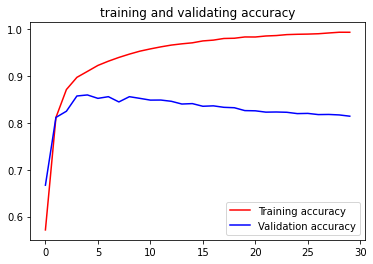

<Figure size 432x288 with 0 Axes>

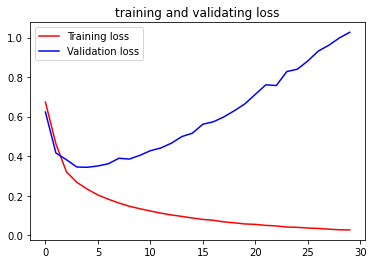

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('training and validating accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validating loss')
plt.legend(loc=0)

In [15]:
layer = model.layers[0]
weights = layer.get_weights()[0]
print(weights.shape)

(10000, 16)


In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [17]:
import io

out_v = io.open('C:/VIN_PYCHARM/ONE/Data/sarcasm_vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('C:/VIN_PYCHARM/ONE/Data/sarcasm_meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [19]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))


[[9.0741873e-01]
 [1.1324326e-05]]
